In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
clean_data = 'Data/Clean/marketing_campaign.csv'
df = pd.read_csv(clean_data, sep=';')

In [3]:
# Select features
X = df[['Age', 'Income', 'Education_Graduation', 'Education_Master']]
y = df['Response'].values
X_scaled = StandardScaler().fit_transform(X)

In [4]:
# Format for Stan
stan_data = {
    'N': len(y),
    'K': X_scaled.shape[1],
    'X': X_scaled,
    'y': y.astype(int)
}

In [5]:
from cmdstanpy import CmdStanModel

# Compile the model
model = CmdStanModel(stan_file='logistic_regression.stan')

# Sample from posterior
fit = model.sample(data=stan_data, chains=4, iter_sampling=1000, iter_warmup=1000, seed=123)

# Show summary
print(fit.summary())



14:47:17 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

14:47:18 - cmdstanpy - INFO - CmdStan done processing.



               Mean      MCSE    StdDev       MAD          5%         50%  \
lp__    -603.094000  0.036291  1.557790  1.427000 -606.138000 -602.762000   
beta[1]   -0.136568  0.001400  0.076844  0.077656   -0.264151   -0.135860   
beta[2]    0.374332  0.001544  0.089258  0.090519    0.229653    0.375117   
beta[3]    0.435926  0.006813  0.292002  0.294169   -0.012640    0.417239   
beta[4]    0.486862  0.006516  0.283248  0.284493    0.053738    0.465589   
alpha     -1.893560  0.001478  0.077665  0.078711   -2.021620   -1.893090   

                95%  ESS_bulk  ESS_tail    R_hat  
lp__    -601.156000   1881.63   2386.89  1.00052  
beta[1]   -0.010710   3025.22   2363.11  1.00045  
beta[2]    0.519822   3372.34   2561.83  1.00045  
beta[3]    0.943570   1870.98   2040.70  1.00160  
beta[4]    0.983116   1921.95   2092.82  1.00137  
alpha     -1.764630   2777.57   2667.08  1.00155  


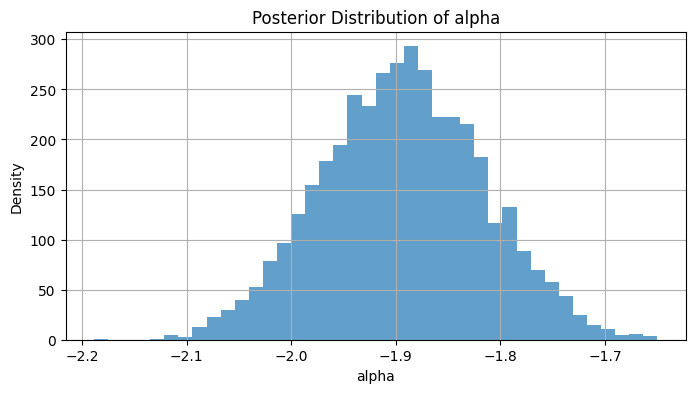

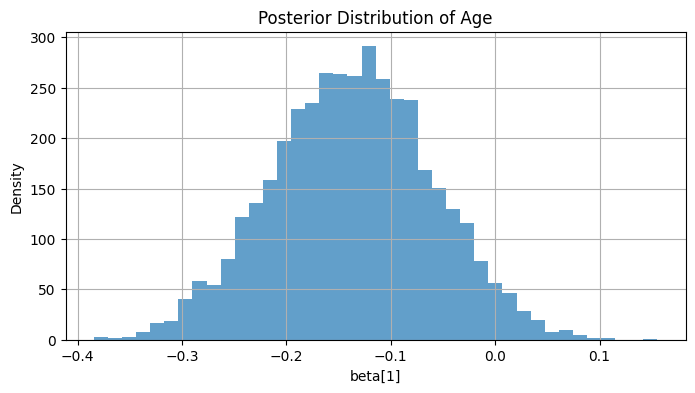

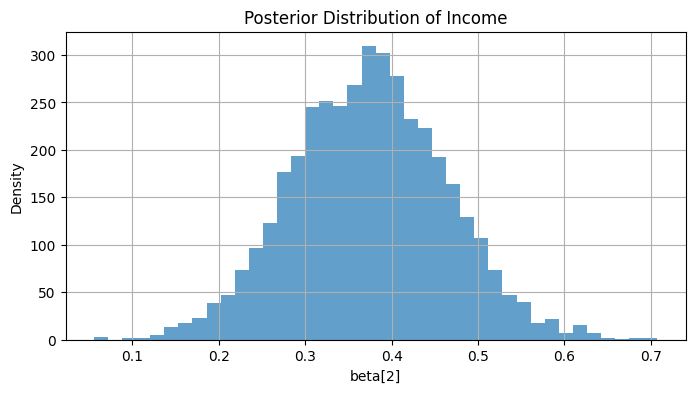

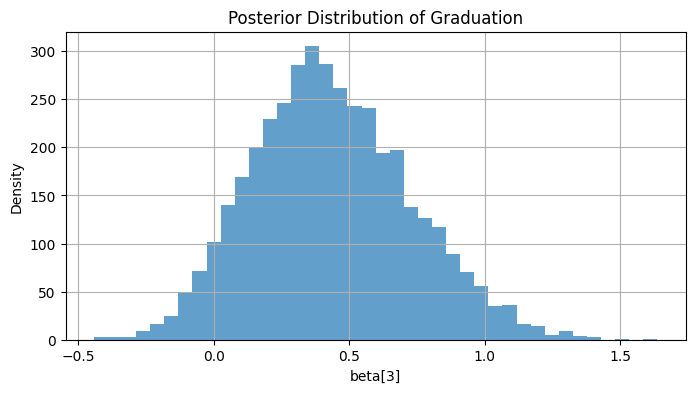

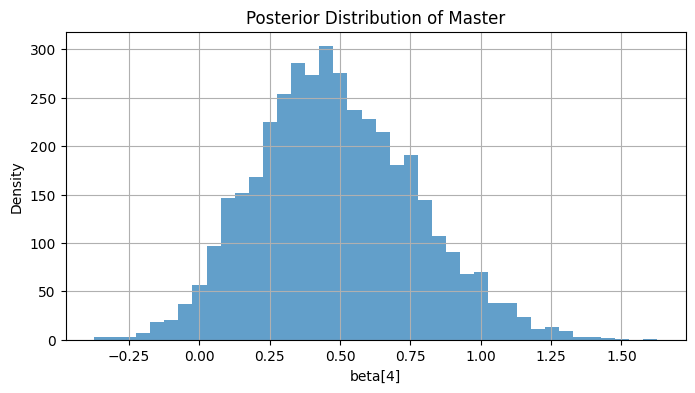

In [6]:
# Visualize the results
import matplotlib.pyplot as plt
visualization_path = 'Visualization'

param_to_feature = {
    'alpha': 'alpha',
    'beta[1]': 'Age',
    'beta[2]': 'Income',
    'beta[3]': 'Graduation',
    'beta[4]': 'Master'
}

posterior_df = fit.draws_pd()

# Plot histograms of each coefficient
params = ['alpha'] + [f'beta[{i}]' for i in range(1, stan_data['K']+1)]

for param in params:
    plt.figure(figsize=(8, 4))
    plt.hist(posterior_df[param], bins=40, alpha=0.7)
    plt.title(f'Posterior Distribution of {param_to_feature[param]}')
    plt.xlabel(param)
    plt.ylabel('Density')
    plt.grid(True)
    plt.savefig(f'{visualization_path}/{param_to_feature[param]}.png')
    plt.show()


In [8]:
summary_df = fit.summary()
print(summary_df[['Mean', '5%', '95%']])


               Mean          5%         95%
lp__    -603.094000 -606.138000 -601.156000
beta[1]   -0.136568   -0.264151   -0.010710
beta[2]    0.374332    0.229653    0.519822
beta[3]    0.435926   -0.012640    0.943570
beta[4]    0.486862    0.053738    0.983116
alpha     -1.893560   -2.021620   -1.764630
